# Exploraory Data Analysis

## Imports

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [177]:
path = "../data/raw/Titanic-Dataset.csv"

df = pd.read_csv(path)

In [178]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
df.set_index("PassengerId", inplace=True)

In [180]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Plots

### Bar Graphs

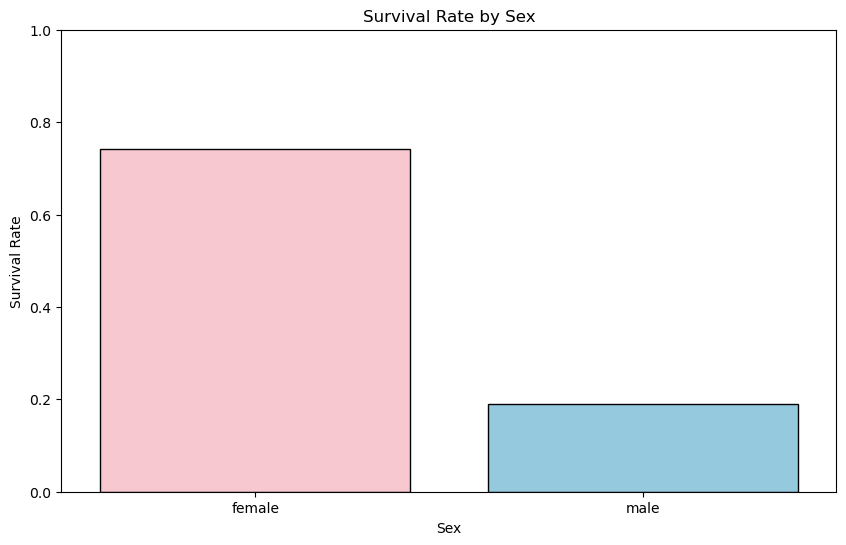

In [182]:
temp = df.groupby("Sex")[["Survived"]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=temp,
    x="Sex",
    y="Survived",
    edgecolor="black",
    hue="Sex",
    palette={"female": "pink", "male": "skyblue"}
)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.ylim(0, 1)
plt.show()

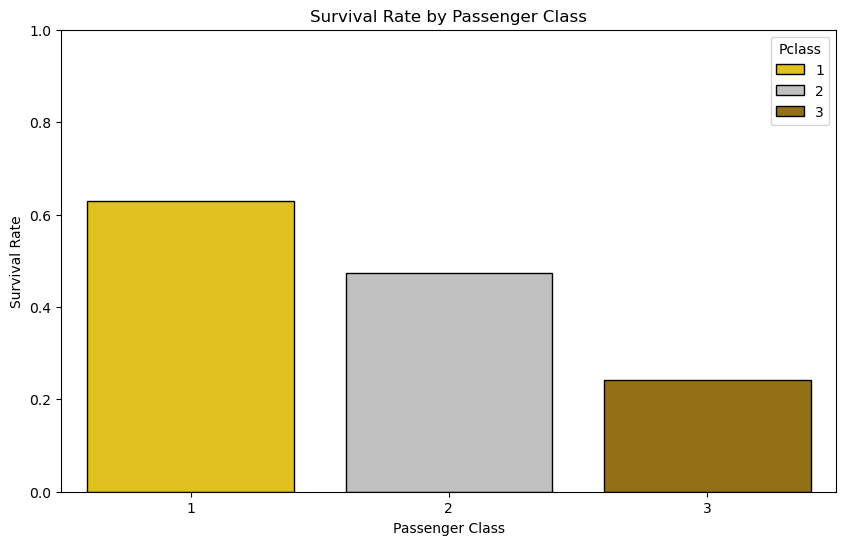

In [183]:
temp = df.groupby("Pclass")[["Survived"]].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=temp,
    x="Pclass",
    y="Survived",
    edgecolor="black",
    hue="Pclass",
    palette={1: "gold", 2: "silver", 3: "#a87900"}
)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.ylim(0, 1)
plt.show()

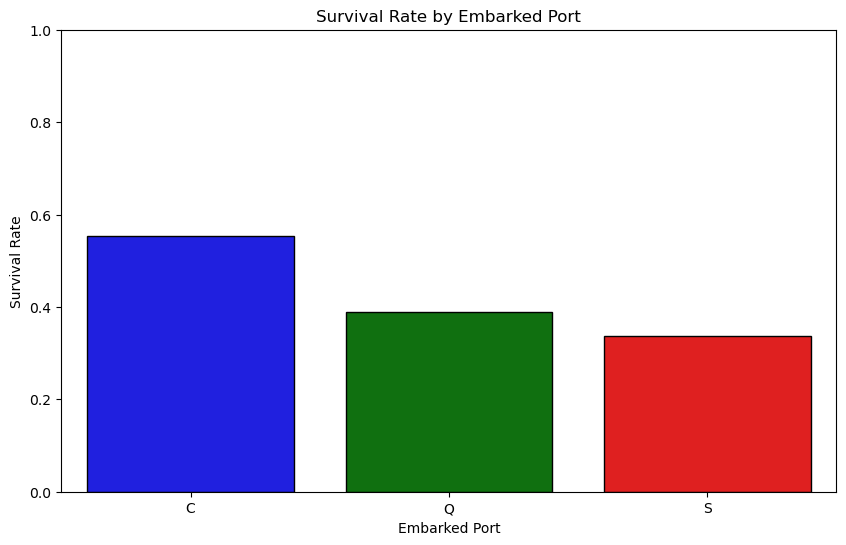

In [184]:
temp = df.groupby("Embarked")[["Survived"]].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    data=temp,
    x="Embarked",
    y="Survived",
    edgecolor="black",
    hue="Embarked",
    palette={"C": "blue", "Q": "green", "S": "red"}
)
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Survival Rate")
plt.xlabel("Embarked Port")
plt.ylim(0, 1)
plt.show()

### Histograms 

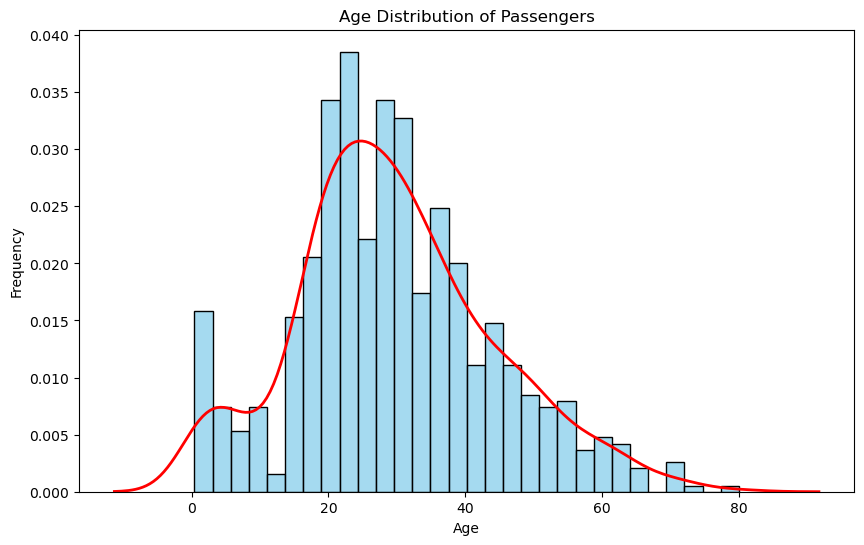

In [185]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data = df,
    x = "Age",
    color = "skyblue",
    bins = 30,
    edgecolor = "black",
    kde = False,  # turn off default KDE,
    stat = "density"  # use density instead of count
)

# add KDE with different color
sns.kdeplot(
    data = df,
    x = "Age",
    color = "red",
    linewidth = 2
)

plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


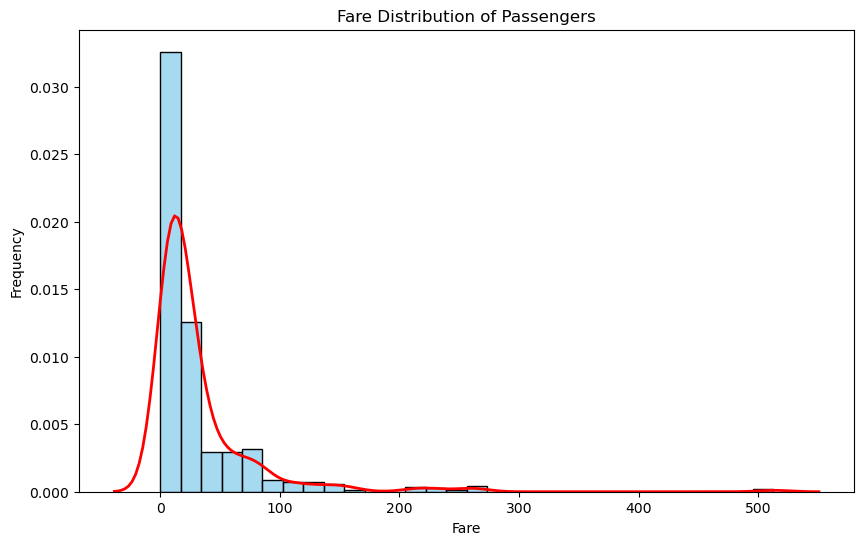

In [186]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data = df,
    x = "Fare",
    color = "skyblue",
    bins = 30,
    edgecolor = "black",
    kde = False,  # turn off default KDE,
    stat = "density"  # use density instead of count
)

# add KDE with different color
sns.kdeplot(
    data = df,
    x = "Fare",
    color = "red",
    linewidth = 2
)

plt.title("Fare Distribution of Passengers")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


In [187]:
df.select_dtypes(include="object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [188]:
df.select_dtypes(include="number").columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [189]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [190]:
df.fillna(df["Age"].mean(), inplace=True)

In [191]:
cabin_p1 = []
cabin_p2 = []
cabin_p3 = []

# Find the first letter of the cabin for each passenger class
for i in df[df["Pclass"] == 1]["Cabin"]:
    if isinstance(i, str):
        cabin_p1.append(i[0])
for i in df[df["Pclass"] == 2]["Cabin"]:
    if isinstance(i, str):
        cabin_p2.append(i[0])
for i in df[df["Pclass"] == 3]["Cabin"]:
    if isinstance(i, str):
        cabin_p3.append(i[0])

cabin_p1 = set(cabin_p1)
cabin_p2 = set(cabin_p2)
cabin_p3 = set(cabin_p3)

def fill_cabin(row):
    num = np.random.randint(0, 99) 
    if pd.isnull(row["Cabin"]) or isinstance(row["Cabin"], float):
        if row["Pclass"] == 1:
            row["Cabin"] = np.random.choice(list(cabin_p1)) + str(num)
        elif row["Pclass"] == 2:
            row["Cabin"] = np.random.choice(list(cabin_p2)) + str(num)
        elif row["Pclass"] == 3:
            row["Cabin"] = np.random.choice(list(cabin_p3)) + str(num)
    return row

In [192]:
df = df.apply(fill_cabin, axis=1)

In [193]:
df["Cabin"] = df["Cabin"].apply(lambda x: x[0])

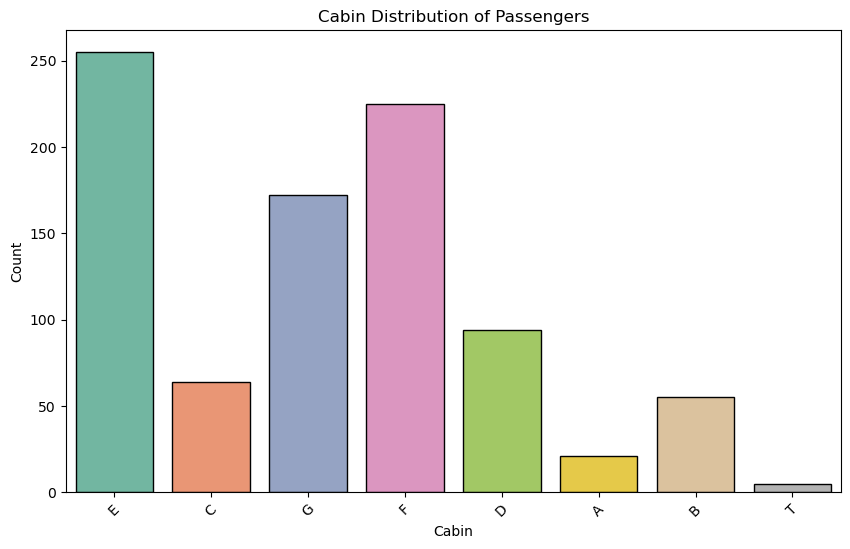

In [194]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="Cabin",
    edgecolor="black",
    palette="Set2"
)
plt.title("Cabin Distribution of Passengers")
plt.xlabel("Cabin")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

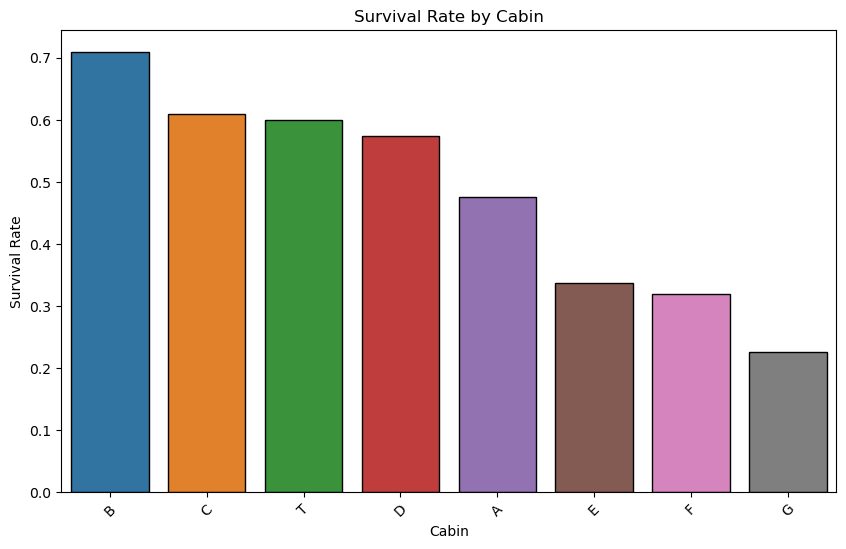

In [195]:
temp = df.groupby("Cabin")[["Survived"]].mean().sort_values(by="Survived", ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=temp,
    x="Cabin",
    y="Survived",
    edgecolor="black",
    hue = "Cabin"
)
plt.title("Survival Rate by Cabin")
plt.xlabel("Cabin")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Get name abbreviations
df["Name"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [197]:
df.rename(columns={"Name": "Title"}, inplace=True)

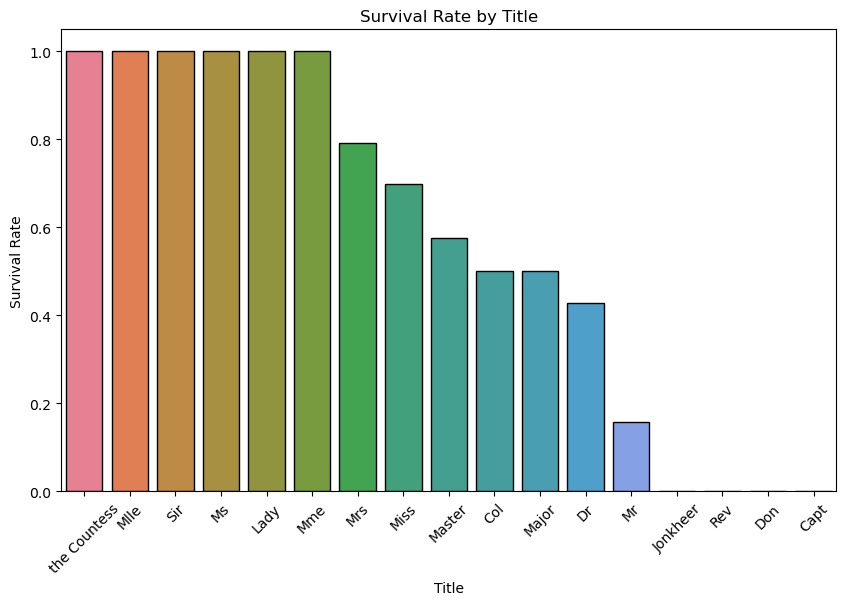

In [198]:
temp = df.groupby("Title")[["Survived"]].mean().sort_values(by="Survived", ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=temp,
    x="Title",
    y="Survived",
    edgecolor="black", 
    hue="Title",
)
plt.title("Survival Rate by Title")
plt.xlabel("Title")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.show()